# London Housing Price Prediction Using Machine Learning Algorithms

Summary

**Acknowledgement**

This was adapted from a post 

Code adapted from 

In [81]:
#importing necessary packages for this project

import numpy as np #for numeric calculations with more complex data structures
import pandas as pd #for data importing, wrangling and cleaning
import matplotlib.pyplot as plt #for plots and data visualisation
import seaborn as sns #for plots and data visualisation
import geopandas as gpd #for geospatial data management and mapping
import contextily as ctx #for retrieving basemaps from the internet

import warnings
warnings.filterwarnings(action='ignore')

Other sub-packages required for machine learning approches will be imported later in the project, where relevant.

**Datasets**

**Main Dataset**

* London Property
* London Property Location
    
**Datasets used for enrichment and new variables**

* Indices of Deprivation
* Public Transport Accessibility Levels
* Lower Layer Super Output Area

**London Property Dataset**

* 'Code' : ID of borough in which the property is located.
* 'Area_name' : Name of the borough in which the property is located.
* 'year' : Year when the sale was completed.
* 'dateoftransfer': Date when the sale was completed.
* 'propertytype' : Indicates the type of house: D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes. 
* 'duration' : Tenure of dwelling (freehold/leasehold)
* 'price' : Price paid for the property.
* 'postcode': The property's postal code.
* 'lad21cd' : The 2021 local authority district code 
* 'transactionid' : Transaction unique identifier 
* 'id' : A unique identifier in Domestic EPCs
* 'tfarea' : The total floor area of the dwelling
* 'numberrooms' : The number of rooms in dwelling
* 'classt' : address matching ratio
* 'CURRENT_ENERGY_EFFICIENCY' : Current energy efficiency rating
* 'POTENTIAL_ENERGY_EFFICIENCY' : Potential energy efficiency rating
* 'CONSTRUCTION_AGE_BAND' : approximate age of the property when constructed.

In [82]:
#importing our London property dataset as a csv file by means of pandas package

london_property = pd.read_csv("Data/London_property.csv")

#have a look at the first few rows of property dataset

london_property.head()

Code       Area_name  year dateoftransfer propertytype duration  \
0  E09000001  City of London  2020     11/02/2020            F        L   
1  E09000001  City of London  2020     08/10/2020            F        L   
2  E09000001  City of London  2020     10/03/2020            F        L   
3  E09000001  City of London  2020     06/02/2020            F        L   
4  E09000001  City of London  2020     02/04/2020            F        L   

     price postcode    lad21cd                           transactionid  \
0   746000  EC1A4HU  E09000001  {9FF0D969-6916-11ED-E053-6C04A8C06383}   
1   649950  EC1A7AB  E09000001  {B5755FFD-ED44-7D01-E053-6C04A8C036B6}   
2  1485000  EC1A7BB  E09000001  {B32EBB13-3D1F-3C99-E053-6C04A8C09CA1}   
3  1500000  EC1A7BD  E09000001  {9FF0D969-69E2-11ED-E053-6C04A8C06383}   
4  1624500  EC1A7BF  E09000001  {BA558B32-1DE7-76EF-E053-6B04A8C0B4B7}   

         id  tfarea  numberrooms  classt  CURRENT_ENERGY_EFFICIENCY  \
0  16048588    61.0          3.0      11                         77   
1  16050681    48.0          3.0      11                         77   
2  16050601   117.0          NaN      11                         83   
3  16051948    99.0          NaN      11                         88   
4  16052047    83.0          NaN      11                         85   

   POTENTIAL_ENERGY_EFFICIENCY           CONSTRUCTION_AGE_BAND  
0                           83    England and Wales: 1996-2002  
1                           82  England and Wales: before 1900  
2                           83                        NO DATA!  
3                           88                        NO DATA!  
4                           85                        NO DATA!

In [83]:
#have a look at the last few rows of property dataset

london_property.tail(5)

Code    Area_name  year dateoftransfer propertytype duration  \
60564  E09000033  Westminster  2020     08/01/2020            F        L   
60565  E09000033  Westminster  2020     03/04/2020            F        L   
60566  E09000033  Westminster  2020     02/10/2020            F        L   
60567  E09000033  Westminster  2020     22/09/2020            F        L   
60568  E09000033  Westminster  2020     11/12/2020            F        L   

         price postcode    lad21cd                           transactionid  \
60564  3500000  WC2R1AB  E09000033  {9FF0D969-FD5C-11ED-E053-6C04A8C06383}   
60565  1500000  WC2R1AB  E09000033  {A96E4ACC-60D7-9205-E053-6C04A8C0DA09}   
60566  1825000  WC2R1AB  E09000033  {B5755FFE-38F8-7D01-E053-6C04A8C036B6}   
60567  2066000  WC2R1HA  E09000033  {B5755FFE-38D0-7D01-E053-6C04A8C036B6}   
60568  1073000  WC2R1HA  E09000033  {BC8936BB-C95E-0E2C-E053-6C04A8C0DBF4}   

             id  tfarea  numberrooms  classt  CURRENT_ENERGY_EFFICIENCY  \
60564  19073130   142.0          NaN      11                         87   
60565  18966370    67.0          NaN      11                         85   
60566  19061104    89.0          NaN      11                         86   
60567  19038407   138.0          NaN      11                         68   
60568  19068232    76.0          NaN      11                         72   

       POTENTIAL_ENERGY_EFFICIENCY CONSTRUCTION_AGE_BAND  
60564                           87              NO DATA!  
60565                           85              NO DATA!  
60566                           86              NO DATA!  
60567                           68              NO DATA!  
60568                           72              NO DATA!

At a glance, it can be easily seen that there are some missing values in the number of rooms and construction age band columns.

In [84]:
#number of rows and columns in property dataset

london_property.shape

(60569, 17)

London property dataset has 60569 rows and 17 columns.

In [85]:
#understanding our columns' types

london_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60569 entries, 0 to 60568
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code                         60569 non-null  object 
 1   Area_name                    60569 non-null  object 
 2   year                         60569 non-null  int64  
 3   dateoftransfer               60569 non-null  object 
 4   propertytype                 60569 non-null  object 
 5   duration                     60569 non-null  object 
 6   price                        60569 non-null  int64  
 7   postcode                     60569 non-null  object 
 8   lad21cd                      60569 non-null  object 
 9   transactionid                60569 non-null  object 
 10  id                           60569 non-null  int64  
 11  tfarea                       60569 non-null  float64
 12  numberrooms                  51338 non-null  float64
 13  classt          

In [86]:
#have a look at descriptive statistics of property data

london_property.drop(['id', 'year'], axis=1).describe().T

count           mean            std   min  \
price                        60569.0  658321.237250  725973.528023   1.0   
tfarea                       60569.0      93.411986      53.077365   0.0   
numberrooms                  51338.0       4.388250       1.812658   1.0   
classt                       60569.0      11.247784       0.431729  11.0   
CURRENT_ENERGY_EFFICIENCY    60569.0      65.267678      12.863690   1.0   
POTENTIAL_ENERGY_EFFICIENCY  60569.0      79.673348       7.276830   1.0   

                                  25%       50%        75%         max  
price                        372000.0  495000.0  710000.00  35500000.0  
tfarea                           62.0      81.0     109.92      1930.0  
numberrooms                       3.0       4.0       5.00        60.0  
classt                           11.0      11.0      11.00        12.0  
CURRENT_ENERGY_EFFICIENCY        58.0      65.0      73.00       109.0  
POTENTIAL_ENERGY_EFFICIENCY      77.0      81.0      85.00       123.0

The minumum price in the dataset is 1, which is inarguably a mistake. Similarly, total area cannot be zero. Minumum value of 1 for current and potential energy efficieny columns.

In [87]:
#removing the row where price is 1

london_property.drop(london_property[london_property["price"]==1.0].index,inplace = True)

In [88]:
#finding rows where total area is 0

london_property[london_property["tfarea"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 784 to 58206
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code                         21 non-null     object 
 1   Area_name                    21 non-null     object 
 2   year                         21 non-null     int64  
 3   dateoftransfer               21 non-null     object 
 4   propertytype                 21 non-null     object 
 5   duration                     21 non-null     object 
 6   price                        21 non-null     int64  
 7   postcode                     21 non-null     object 
 8   lad21cd                      21 non-null     object 
 9   transactionid                21 non-null     object 
 10  id                           21 non-null     int64  
 11  tfarea                       21 non-null     float64
 12  numberrooms                  0 non-null      float64
 13  classt           

There are 21 rows where total area is zero. In those rows, the values of number of rooms and construction age band columns is null. Therefore, we can drop those rows.

In [89]:
london_property.drop(london_property[london_property["tfarea"]==0].index,inplace = True)

In [90]:
#understanding missing values in property data

london_property.isna().sum()

Code                              0
Area_name                         0
year                              0
dateoftransfer                    0
propertytype                      0
duration                          0
price                             0
postcode                          0
lad21cd                           0
transactionid                     0
id                                0
tfarea                            0
numberrooms                    9210
classt                            0
CURRENT_ENERGY_EFFICIENCY         0
POTENTIAL_ENERGY_EFFICIENCY       0
CONSTRUCTION_AGE_BAND            56
dtype: int64

Construction Age Band column has 56 NaN values as well as other missing values of NO DATA!.

In [91]:
#convert NO DATA! values into NaN

london_property.replace('NO DATA!',np.NaN, inplace =True )


In [92]:
#number of missing values in each column

london_property.isna().sum()

Code                              0
Area_name                         0
year                              0
dateoftransfer                    0
propertytype                      0
duration                          0
price                             0
postcode                          0
lad21cd                           0
transactionid                     0
id                                0
tfarea                            0
numberrooms                    9210
classt                            0
CURRENT_ENERGY_EFFICIENCY         0
POTENTIAL_ENERGY_EFFICIENCY       0
CONSTRUCTION_AGE_BAND          9253
dtype: int64

In [93]:
#grouping housing price values by London boroughs 

borough_property =london_property.groupby("Area_name")["price"].agg(["count",min,max,"median","mean"]).reset_index()
borough_property

Area_name  count     min       max     median          mean
0     Barking and Dagenham   1044   90000    660000   322000.0  3.259117e+05
1                   Barnet   2498   97500  23500000   575000.0  7.191142e+05
2                   Bexley   2456   82500   1335000   380000.0  3.946690e+05
3                    Brent   1220   82500   6050000   525000.0  6.473418e+05
4                  Bromley   3842   84000   3500000   475000.0  5.313938e+05
5                   Camden   1225  185000  13350000   790000.0  1.135283e+06
6           City of London     59  300000   6450000   795000.0  1.012132e+06
7                  Croydon   3024   88000   2450000   405000.0  4.377883e+05
8                   Ealing   1878   80625   3350000   509500.0  6.161741e+05
9                  Enfield   1694  108000   3865000   424000.0  5.067475e+05
10               Greenwich   2113   80000   2700000   450000.0  4.998757e+05
11                 Hackney   1333   98750   6398060   610000.0  7.310062e+05
12  Hammersmith and Fulham   1472  112500   8500000   805000.0  1.041627e+06
13                Haringey   1442  126000  11000000   540000.0  7.223451e+05
14                  Harrow   1386   75000   2900000   500000.0  5.406133e+05
15                Havering   2620   82500   3975000   389500.0  4.153171e+05
16              Hillingdon   2114   82500   3000000   440000.0  4.801452e+05
17                Hounslow   1444   62500   8000000   443750.0  5.761770e+05
18               Islington   1271  125000   5275000   650000.0  8.261761e+05
19  Kensington and Chelsea   1013  150000  28000000  1345000.0  2.219262e+06
20    Kingston upon Thames   1533  140000   8500000   505000.0  6.110924e+05
21                 Lambeth   2432  120000   6875000   580000.0  7.234249e+05
22                Lewisham   2377  114375   3200000   450000.0  5.111555e+05
23                  Merton   1708  119250   6750000   510000.0  6.963639e+05
24                  Newham   1344  100000   1222500   411472.5  4.370257e+05
25               Redbridge   1587   82500   1725000   450000.0  4.911759e+05
26    Richmond upon Thames   2096  135000   9900000   705000.0  9.023648e+05
27               Southwark   1943  102500   5100000   550000.0  6.679670e+05
28                  Sutton   1897  105000   2200000   420000.0  4.581573e+05
29           Tower Hamlets   2136   92500   3999950   510000.0  5.673042e+05
30          Waltham Forest   1895  108000   1475000   480000.0  5.031341e+05
31              Wandsworth   3154  106250   5950000   685000.0  8.466449e+05
32             Westminster   1297  200000  35500000   940000.0  1.688265e+06

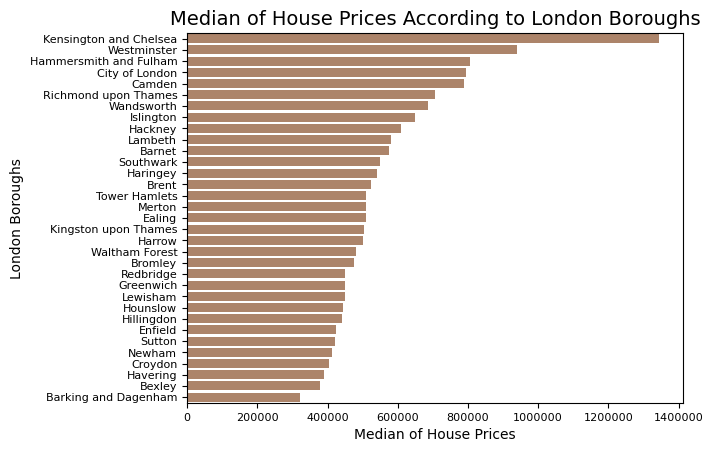

In [94]:
#creata a bar chart of median house price in London according to boroughs

g =sns.barplot(y = "Area_name", x="median", data = borough_property, color="#b7825f", order=borough_property.sort_values('median',ascending =False).Area_name)

g.set_title('Median of House Prices According to London Boroughs',  fontsize=14)
g.set(xlabel = 'Median of House Prices', ylabel = 'London Boroughs')
g.tick_params(axis='both', which='major', labelsize=8)
g.ticklabel_format(style='plain', axis='x')



**London Properties Location Data**

The second dataset is ```london_properties_loc.csv``` which contains:
* 'Postcode': The property's postal code.
* 'Eastings': easting of property
* 'Northings': northing of property

This data is going to be used to geolocate our first dataset.

In [95]:
#importing the dataset

london_loc = pd.read_csv("Data/London_loc.csv")


In [96]:
london_loc.shape

(39653, 3)

In [97]:
london_loc.head()

Postcode  Eastings  Northings
0  EC1A4HU    532118     181647
1  EC1A7AB    532008     181777
2  EC1A7BB    532022     181628
3  EC1A7BD    532023     181707
4  EC1A7BF    531998     181655

In [98]:
london_loc.rename(columns = {"Postcode":"postcode"}, inplace =True)

In [99]:
london_property_loc = london_property.merge(london_loc, on = "postcode", how= "left" )

In [100]:
london_property_gdf = gpd.GeoDataFrame(
    london_property_loc, 
    geometry=gpd.points_from_xy(london_property_loc.Eastings, 
                                      london_property_loc.Northings)).set_crs(epsg=27700)

In [101]:
london_property_gdf

Code       Area_name  year dateoftransfer propertytype duration  \
0      E09000001  City of London  2020     11/02/2020            F        L   
1      E09000001  City of London  2020     08/10/2020            F        L   
2      E09000001  City of London  2020     10/03/2020            F        L   
3      E09000001  City of London  2020     06/02/2020            F        L   
4      E09000001  City of London  2020     02/04/2020            F        L   
...          ...             ...   ...            ...          ...      ...   
60542  E09000033     Westminster  2020     08/01/2020            F        L   
60543  E09000033     Westminster  2020     03/04/2020            F        L   
60544  E09000033     Westminster  2020     02/10/2020            F        L   
60545  E09000033     Westminster  2020     22/09/2020            F        L   
60546  E09000033     Westminster  2020     11/12/2020            F        L   

         price postcode    lad21cd                           transactionid  \
0       746000  EC1A4HU  E09000001  {9FF0D969-6916-11ED-E053-6C04A8C06383}   
1       649950  EC1A7AB  E09000001  {B5755FFD-ED44-7D01-E053-6C04A8C036B6}   
2      1485000  EC1A7BB  E09000001  {B32EBB13-3D1F-3C99-E053-6C04A8C09CA1}   
3      1500000  EC1A7BD  E09000001  {9FF0D969-69E2-11ED-E053-6C04A8C06383}   
4      1624500  EC1A7BF  E09000001  {BA558B32-1DE7-76EF-E053-6B04A8C0B4B7}   
...        ...      ...        ...                                     ...   
60542  3500000  WC2R1AB  E09000033  {9FF0D969-FD5C-11ED-E053-6C04A8C06383}   
60543  1500000  WC2R1AB  E09000033  {A96E4ACC-60D7-9205-E053-6C04A8C0DA09}   
60544  1825000  WC2R1AB  E09000033  {B5755FFE-38F8-7D01-E053-6C04A8C036B6}   
60545  2066000  WC2R1HA  E09000033  {B5755FFE-38D0-7D01-E053-6C04A8C036B6}   
60546  1073000  WC2R1HA  E09000033  {BC8936BB-C95E-0E2C-E053-6C04A8C0DBF4}   

             id  tfarea  numberrooms  classt  CURRENT_ENERGY_EFFICIENCY  \
0      16048588    61.0          3.0      11                         77   
1      16050681    48.0          3.0      11                         77   
2      16050601   117.0          NaN      11                         83   
3      16051948    99.0          NaN      11                         88   
4      16052047    83.0          NaN      11                         85   
...         ...     ...          ...     ...                        ...   
60542  19073130   142.0          NaN      11                         87   
60543  18966370    67.0          NaN      11                         85   
60544  19061104    89.0          NaN      11                         86   
60545  19038407   138.0          NaN      11                         68   
60546  19068232    76.0          NaN      11                         72   

       POTENTIAL_ENERGY_EFFICIENCY           CONSTRUCTION_AGE_BAND  Eastings  \
0                               83    England and Wales: 1996-2002    532118   
1                               82  England and Wales: before 1900    532008   
2                               83                             NaN    532022   
3                               88                             NaN    532023   
4                               85                             NaN    531998   
...                            ...                             ...       ...   
60542                           87                             NaN    530912   
60543                           85                             NaN    530912   
60544                           86                             NaN    530912   
60545                           68                             NaN    530681   
60546                           72                             NaN    530681   

       Northings                       geometry  
0         181647  POINT (532118.000 181647.000)  
1         181777  POINT (532008.000 181777.000)  
2         181628  POINT (532022.000 181628.000)  
3         181707  POINT (532023.000 181707.000)  
4         1816

In [102]:
london_property_gdf.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

Indices of Deprivation Data

https://data.london.gov.uk/dataset/indices-of-deprivation

In [103]:
deprivation = pd.read_excel("Data/ID 2019 for London.xlsx",sheet_name= "IMD 2019")

# Installing openpyxl for read_excel is required

deprivation.head()

LSOA code (2011)     LSOA name (2011) Local Authority District code (2019)  \
0        E01000001  City of London 001A                            E09000001   
1        E01000002  City of London 001B                            E09000001   
2        E01000003  City of London 001C                            E09000001   
3        E01000005  City of London 001E                            E09000001   
4        E01032739  City of London 001F                            E09000001   

  Local Authority District name (2019)  \
0                       City of London   
1                       City of London   
2                       City of London   
3                       City of London   
4                       City of London   

   Index of Multiple Deprivation (IMD) Score  \
0                                      6.208   
1                                      5.143   
2                                     19.402   
3                                     28.652   
4                                     13.584   

   Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
0                                              29199                     
1                                              30379                     
2                                              14915                     
3                                               8678                     
4                                              20391                     

   Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                  9                                    
1                                                 10                                    
2                                                  5                                    
3                                                  3                                    
4                                                  7                                    

   Income Score (rate)  Income Rank (where 1 is most deprived)  \
0                0.007                                   32831   
1                0.034                                   29901   
2                0.086                                   18510   
3                0.211                                    6029   
4                0.014                                   32638   

   Income Decile (where 1 is most deprived 10% of LSOAs)  ...  \
0                                                 10      ...   
1                                                 10      ...   
2                                                  6      ...   
3                                                  2      ...   
4                                                 10      ...   

   Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                 10                                  
1                                                 10                                  
2                                                  6                                  
3                                                  6                                  
4                                                  8                                  

   Crime Score  Crime Rank (where 1 is most deprived)  \
0       -2.012                                  32662   
1       -2.343                                  32789   
2       -1.032                                  29363   
3       -1.317                                  31059   
4       -1.560                                  31947   

   Crime Decile (where 1 is most deprived 10% of LSOAs)  \
0                                                 10      
1                                                 10      
2                                                  9      
3                                                 10      
4                                                 

In [104]:
deprivation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 28 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   LSOA code (2011)                                                                    4835 non-null   object 
 1   LSOA name (2011)                                                                    4835 non-null   object 
 2   Local Authority District code (2019)                                                4835 non-null   object 
 3   Local Authority District name (2019)                                                4835 non-null   object 
 4   Index of Multiple Deprivation (IMD) Score                                           4835 non-null   float64
 5   Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                 4835 non-null

In [105]:
deprivation = deprivation[["LSOA code (2011)","LSOA name (2011)","Index of Multiple Deprivation (IMD) Score","Income Score (rate)","Employment Score (rate)","Education, Skills and Training Score","Health Deprivation and Disability Score","Crime Score","Barriers to Housing and Services Score","Living Environment Score"]]
deprivation.head()

LSOA code (2011)     LSOA name (2011)  \
0        E01000001  City of London 001A   
1        E01000002  City of London 001B   
2        E01000003  City of London 001C   
3        E01000005  City of London 001E   
4        E01032739  City of London 001F   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                      6.208                0.007   
1                                      5.143                0.034   
2                                     19.402                0.086   
3                                     28.652                0.211   
4                                     13.584                0.014   

   Employment Score (rate)  Education, Skills and Training Score  \
0                    0.010                                 0.024   
1                    0.027                                 0.063   
2                    0.086                                 5.804   
3                    0.136                                22.260   
4                    0.011                                 1.771   

   Health Deprivation and Disability Score  Crime Score  \
0                                   -1.654       -2.012   
1                                   -1.115       -2.343   
2                                   -0.102       -1.032   
3                                   -0.121       -1.317   
4                                   -0.676       -1.560   

   Barriers to Housing and Services Score  Living Environment Score  
0                                  29.472                    31.873  
1                                  24.412                    23.084  
2                                  40.103                    40.535  
3                                  39.900                    28.979  
4                                  46.314                    49.165

LSOA

https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

*Contains National Statistics data © Crown copyright and database right [2015] <br>
*Contains Ordnance Survey data © Crown copyright and database right [2015]*

In [106]:
lsoa = gpd.read_file("Data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp").to_crs("EPSG:27700")

lsoa.head()

LSOA11CD                   LSOA11NM   MSOA11CD                  MSOA11NM  \
0  E01000001        City of London 001A  E02000001        City of London 001   
1  E01000002        City of London 001B  E02000001        City of London 001   
2  E01000003        City of London 001C  E02000001        City of London 001   
3  E01000005        City of London 001E  E02000001        City of London 001   
4  E01000006  Barking and Dagenham 016A  E02000017  Barking and Dagenham 016   

     LAD11CD               LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  \
0  E09000001        City of London  E12000007  London      1465      1465   
1  E09000001        City of London  E12000007  London      1436      1436   
2  E09000001        City of London  E12000007  London      1346      1250   
3  E09000001        City of London  E12000007  London       985       985   
4  E09000002  Barking and Dagenham  E12000007  London      1703      1699   

   COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ  \
0          0   112.9     876        1.7   
1          0    62.9     830        1.7   
2         96   227.7     817        1.5   
3          0    52.0     467        2.1   
4          4   116.2     543        3.1   

                                            geometry  
0  POLYGON ((532105.092 182011.230, 532162.491 18...  
1  POLYGON ((532746.813 181786.891, 532671.688 18...  
2  POLYGON ((532135.145 182198.119, 532158.250 18...  
3  POLYGON ((533807.946 180767.770, 533649.063 18...  
4  POLYGON ((545122.049 184314.931, 545271.917 18...

In [107]:
lsoa.shape

(4835, 15)

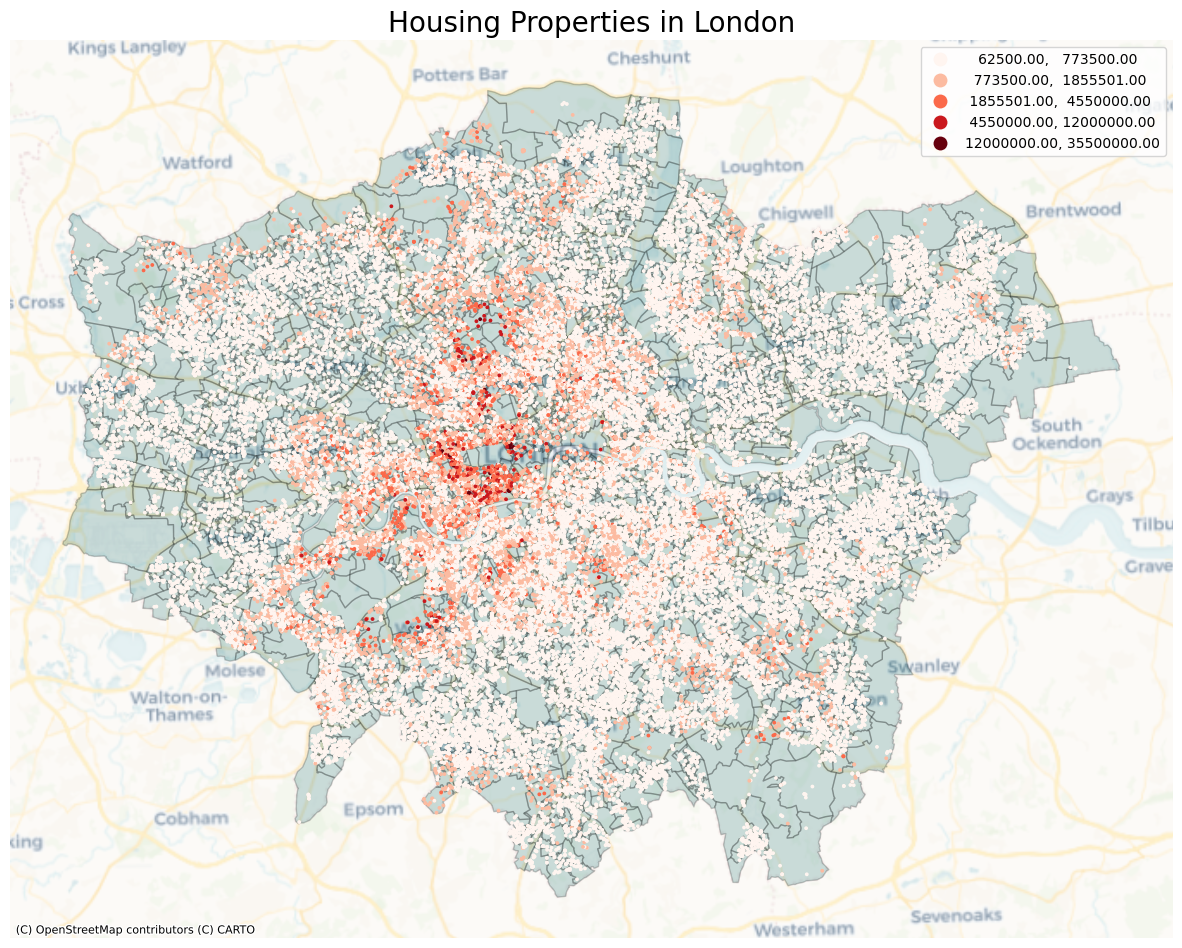

In [108]:
fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')


lsoa.plot(ax=ax, color='#00615f', edgecolor='black',alpha = 0.2)


london_property_gdf.plot(ax=ax,marker='o', markersize=3,column="price",scheme = "NaturalBreaks", cmap="Reds",legend=True)



# this adds the basemap
ctx.add_basemap(ax, crs=london_property_gdf.crs, alpha=0.6, source=ctx.providers.CartoDB.Voyager, zoom =10)

# this sets the title
ax.set_title("Housing Properties in London",fontsize= 20)

# this removes the axis
ax.set_axis_off()

*The code below was adapted from one of the training by Leah Wasser and Jenny Palomino in Earth Data Science website.<br>
(Lesson 5. How to Join Attributes From One Shapefile to Another in Open Source Python Using Geopandas: GIS in Python) <br>
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/spatial-joins-in-python-geopandas-shapely

In [109]:
london_property_gdf1= gpd.sjoin(london_property_gdf,
                         lsoa, 
                         how="inner", 
                         op='intersects')

london_property_gdf1.head()

Code       Area_name  year dateoftransfer propertytype duration  \
0   E09000001  City of London  2020     11/02/2020            F        L   
12  E09000001  City of London  2020     19/06/2020            F        L   
32  E09000001  City of London  2020     24/08/2020            F        L   
33  E09000001  City of London  2020     13/11/2020            F        L   
34  E09000001  City of London  2020     30/11/2020            F        L   

      price postcode    lad21cd                           transactionid  ...  \
0    746000  EC1A4HU  E09000001  {9FF0D969-6916-11ED-E053-6C04A8C06383}  ...   
12   800000  EC1A7BT  E09000001  {AE4D86D4-3DDD-4619-E053-6C04A8C03CD0}  ...   
32  1680000  EC2Y8BP  E09000001  {B32EBB13-BC59-3C99-E053-6C04A8C09CA1}  ...   
33   640000  EC2Y8BU  E09000001  {B82222ED-16A4-6691-E053-6B04A8C02FB2}  ...   
34   645000  EC2Y8BX  E09000001  {BA558B32-D7D6-76EF-E053-6B04A8C0B4B7}  ...   

      LAD11CD         LAD11NM    RGN11CD  RGN11NM  USUALRES  HHOLDRES  \
0   E09000001  City of London  E12000007   London      1465      1465   
12  E09000001  City of London  E12000007   London      1465      1465   
32  E09000001  City of London  E12000007   London      1465      1465   
33  E09000001  City of London  E12000007   London      1465      1465   
34  E09000001  City of London  E12000007   London      1465      1465   

   COMESTRES  POPDEN  HHOLDS AVHHOLDSZ  
0          0   112.9     876       1.7  
12         0   112.9     876       1.7  
32         0   112.9     876       1.7  
33         0   112.9     876       1.7  
34         0   112.9     876       1.7  

[5 rows x 35 columns]

In [110]:
london_property_gdf2 = pd.merge(left = london_property_gdf1, 
                                right = deprivation, 
                                left_on='LSOA11CD',
                                right_on='LSOA code (2011)')

london_property_gdf2.head()

Code       Area_name  year dateoftransfer propertytype duration  \
0  E09000001  City of London  2020     11/02/2020            F        L   
1  E09000001  City of London  2020     19/06/2020            F        L   
2  E09000001  City of London  2020     24/08/2020            F        L   
3  E09000001  City of London  2020     13/11/2020            F        L   
4  E09000001  City of London  2020     30/11/2020            F        L   

     price postcode    lad21cd                           transactionid  ...  \
0   746000  EC1A4HU  E09000001  {9FF0D969-6916-11ED-E053-6C04A8C06383}  ...   
1   800000  EC1A7BT  E09000001  {AE4D86D4-3DDD-4619-E053-6C04A8C03CD0}  ...   
2  1680000  EC2Y8BP  E09000001  {B32EBB13-BC59-3C99-E053-6C04A8C09CA1}  ...   
3   640000  EC2Y8BU  E09000001  {B82222ED-16A4-6691-E053-6B04A8C02FB2}  ...   
4   645000  EC2Y8BX  E09000001  {BA558B32-D7D6-76EF-E053-6B04A8C0B4B7}  ...   

   LSOA code (2011)     LSOA name (2011)  \
0         E01000001  City of London 001A   
1         E01000001  City of London 001A   
2         E01000001  City of London 001A   
3         E01000001  City of London 001A   
4         E01000001  City of London 001A   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                      6.208                0.007   
1                                      6.208                0.007   
2                                      6.208                0.007   
3                                      6.208                0.007   
4                                      6.208                0.007   

   Employment Score (rate)  Education, Skills and Training Score  \
0                     0.01                                 0.024   
1                     0.01                                 0.024   
2                     0.01                                 0.024   
3                     0.01                                 0.024   
4                     0.01                                 0.024   

  Health Deprivation and Disability Score  Crime Score  \
0                                  -1.654       -2.012   
1                                  -1.654       -2.012   
2                                  -1.654       -2.012   
3                                  -1.654       -2.012   
4                                  -1.654       -2.012   

   Barriers to Housing and Services Score Living Environment Score  
0                                  29.472                   31.873  
1                                  29.472                   31.873  
2                                  29.472                   31.873  
3                                  29.472                   31.873  
4                                  29.472                   31.873  

[5 rows x 45 columns]

In [111]:
ptal = pd.read_csv("Data/LSOA2011 AvPTAI2015.csv")[["LSOA2011","PTAL"]]

ptal.head()

LSOA2011 PTAL
0  E01000001   6b
1  E01000002   6b
2  E01000003   6b
3  E01000005   6b
4  E01000006    5

In [112]:
london_property_gdf2 = pd.merge(left = london_property_gdf2, 
                                right = ptal, 
                                left_on='LSOA11CD',
                                right_on='LSOA2011')

london_property_gdf2.head()

Code       Area_name  year dateoftransfer propertytype duration  \
0  E09000001  City of London  2020     11/02/2020            F        L   
1  E09000001  City of London  2020     19/06/2020            F        L   
2  E09000001  City of London  2020     24/08/2020            F        L   
3  E09000001  City of London  2020     13/11/2020            F        L   
4  E09000001  City of London  2020     30/11/2020            F        L   

     price postcode    lad21cd                           transactionid  ...  \
0   746000  EC1A4HU  E09000001  {9FF0D969-6916-11ED-E053-6C04A8C06383}  ...   
1   800000  EC1A7BT  E09000001  {AE4D86D4-3DDD-4619-E053-6C04A8C03CD0}  ...   
2  1680000  EC2Y8BP  E09000001  {B32EBB13-BC59-3C99-E053-6C04A8C09CA1}  ...   
3   640000  EC2Y8BU  E09000001  {B82222ED-16A4-6691-E053-6B04A8C02FB2}  ...   
4   645000  EC2Y8BX  E09000001  {BA558B32-D7D6-76EF-E053-6B04A8C0B4B7}  ...   

   Index of Multiple Deprivation (IMD) Score  Income Score (rate)  \
0                                      6.208                0.007   
1                                      6.208                0.007   
2                                      6.208                0.007   
3                                      6.208                0.007   
4                                      6.208                0.007   

   Employment Score (rate)  Education, Skills and Training Score  \
0                     0.01                                 0.024   
1                     0.01                                 0.024   
2                     0.01                                 0.024   
3                     0.01                                 0.024   
4                     0.01                                 0.024   

   Health Deprivation and Disability Score  Crime Score  \
0                                   -1.654       -2.012   
1                                   -1.654       -2.012   
2                                   -1.654       -2.012   
3                                   -1.654       -2.012   
4                                   -1.654       -2.012   

  Barriers to Housing and Services Score  Living Environment Score   LSOA2011  \
0                                 29.472                    31.873  E01000001   
1                                 29.472                    31.873  E01000001   
2                                 29.472                    31.873  E01000001   
3                                 29.472                    31.873  E01000001   
4                                 29.472                    31.873  E01000001   

  PTAL  
0   6b  
1   6b  
2   6b  
3   6b  
4   6b  

[5 rows x 47 columns]

In [113]:
london_property_gdf2['PTAL']= london_property_gdf2['PTAL'].map({"0":0,'1a':1,'1b':'2',"2":3,"3":4,"4":5,"5":6,"6a":7,"6b":8})


In [114]:
london_property_gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 60545 entries, 0 to 60544
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Code                                       60545 non-null  object  
 1   Area_name                                  60545 non-null  object  
 2   year                                       60545 non-null  int64   
 3   dateoftransfer                             60545 non-null  object  
 4   propertytype                               60545 non-null  object  
 5   duration                                   60545 non-null  object  
 6   price                                      60545 non-null  int64   
 7   postcode                                   60545 non-null  object  
 8   lad21cd                                    60545 non-null  object  
 9   transactionid                              60545 non-null  object  
 10  id

In [115]:
london_property_gdf2['PTAL'] = london_property_gdf2['PTAL'].astype(int)


In [116]:
ptal_granular = gpd.read_file("/Users/user/Desktop/2015  PTALs Grid Values/2015  PTALs Contours 280515.TAB").to_crs("EPSG:27700")

ptal_granular.head(15)

Lower  Upper PTAL                                           geometry
0   0.000    0.0    0  MULTIPOLYGON (((554862.964 180220.108, 554880....
1   0.001    2.5   1a  MULTIPOLYGON (((551461.149 173824.073, 551344....
2   2.500    5.0   1b  MULTIPOLYGON (((545416.787 192699.693, 545458....
3   5.000   10.0    2  MULTIPOLYGON (((505136.122 184636.304, 505147....
4  10.000   15.0    3  MULTIPOLYGON (((543244.654 183669.000, 543200....
5  15.000   20.0    4  MULTIPOLYGON (((541773.440 178808.473, 541773....
6  20.000   25.0    5  MULTIPOLYGON (((538456.139 180723.226, 538435....
7  25.000   40.0   6a  MULTIPOLYGON (((535644.859 182932.556, 535544....
8  40.000  200.0   6b  MULTIPOLYGON (((534241.568 181017.803, 534216....

In [117]:
london_property_gdf2 = london_property_gdf2.drop(['index_right'], axis=1)

london_property_gdf2= gpd.sjoin(london_property_gdf2,
                         ptal_granular, 
                         how="inner", 
                         op='intersects')

london_property_gdf2.head()

Code       Area_name  year dateoftransfer propertytype duration  \
0  E09000001  City of London  2020     11/02/2020            F        L   
1  E09000001  City of London  2020     19/06/2020            F        L   
2  E09000001  City of London  2020     24/08/2020            F        L   
3  E09000001  City of London  2020     13/11/2020            F        L   
4  E09000001  City of London  2020     30/11/2020            F        L   

     price postcode    lad21cd                           transactionid  ...  \
0   746000  EC1A4HU  E09000001  {9FF0D969-6916-11ED-E053-6C04A8C06383}  ...   
1   800000  EC1A7BT  E09000001  {AE4D86D4-3DDD-4619-E053-6C04A8C03CD0}  ...   
2  1680000  EC2Y8BP  E09000001  {B32EBB13-BC59-3C99-E053-6C04A8C09CA1}  ...   
3   640000  EC2Y8BU  E09000001  {B82222ED-16A4-6691-E053-6B04A8C02FB2}  ...   
4   645000  EC2Y8BX  E09000001  {BA558B32-D7D6-76EF-E053-6B04A8C0B4B7}  ...   

   Health Deprivation and Disability Score  Crime Score  \
0                                   -1.654       -2.012   
1                                   -1.654       -2.012   
2                                   -1.654       -2.012   
3                                   -1.654       -2.012   
4                                   -1.654       -2.012   

   Barriers to Housing and Services Score  Living Environment Score  \
0                                  29.472                    31.873   
1                                  29.472                    31.873   
2                                  29.472                    31.873   
3                                  29.472                    31.873   
4                                  29.472                    31.873   

    LSOA2011  PTAL_left index_right  Lower  Upper PTAL_right  
0  E01000001          8           8   40.0  200.0         6b  
1  E01000001          8           8   40.0  200.0         6b  
2  E01000001          8           8   40.0  200.0         6b  
3  E01000001          8           8   40.0  200.0         6b  
4  E01000001          8           8   40.0  200.0         6b  

[5 rows x 50 columns]

In [118]:
dfscore=london_property_gdf2[['price',
       'tfarea',
       'numberrooms','CURRENT_ENERGY_EFFICIENCY',
       'POTENTIAL_ENERGY_EFFICIENCY',"propertytype","duration","postcode","Index of Multiple Deprivation (IMD) Score","Income Score (rate)","Employment Score (rate)","Education, Skills and Training Score","Health Deprivation and Disability Score","Crime Score","Barriers to Housing and Services Score","Living Environment Score","PTAL_left","Upper"]]

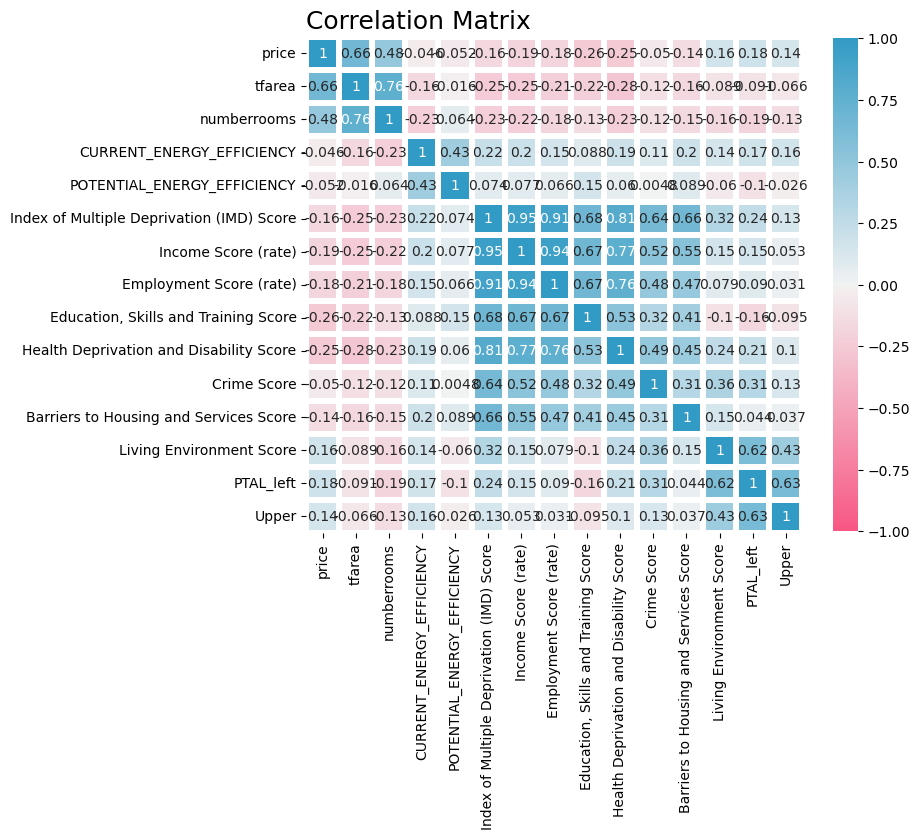

In [119]:
# Compute the correlation matrix
corr = dfscore.corr()
# Set up the matplotlib figure
plt.figure(figsize=(8,8))
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, cmap=cmap, vmin=-1, center=0, annot=True,
            square=True, linewidths=3, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', loc='left', fontsize=18)
plt.yticks(rotation=0)
print(cmap)

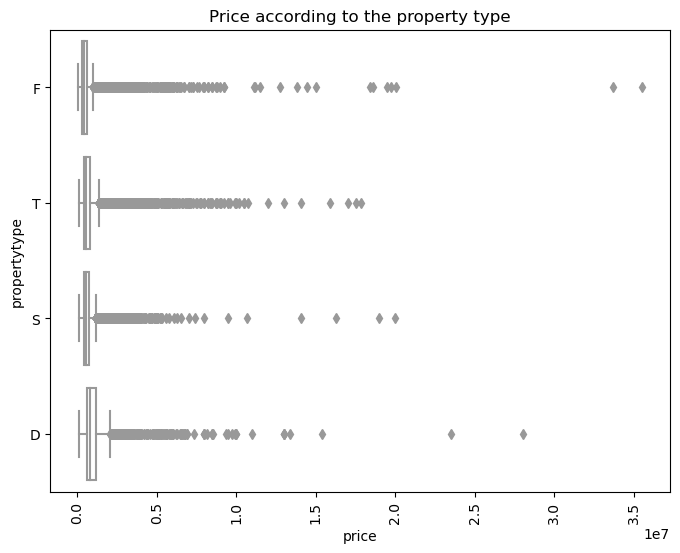

In [120]:
plt.figure(figsize=(8,6))
plt.title('Price according to the property type',fontsize=12)
sns.boxplot(data=dfscore,x='price',y='propertytype',orient='h',color='white')
plt.xticks(rotation=90)
plt.show()

In [121]:
Q1 = dfscore['price'].quantile(0.25)
Q3 = dfscore['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfscore['price'] >= Q1 - 1.5 * IQR) & (dfscore['price'] <= Q3 + 1.5 *IQR) & (dfscore["numberrooms"] < 14)
df_without_outliers = dfscore.loc[filter] 


df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47011 entries, 0 to 60477
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   price                                      47011 non-null  int64  
 1   tfarea                                     47011 non-null  float64
 2   numberrooms                                47011 non-null  float64
 3   CURRENT_ENERGY_EFFICIENCY                  47011 non-null  int64  
 4   POTENTIAL_ENERGY_EFFICIENCY                47011 non-null  int64  
 5   propertytype                               47011 non-null  object 
 6   duration                                   47011 non-null  object 
 7   postcode                                   47011 non-null  object 
 8   Index of Multiple Deprivation (IMD) Score  47011 non-null  float64
 9   Income Score (rate)                        47011 non-null  float64
 10  Employment Score (rate

In [122]:
filter1 = (london_property_gdf['price'] <= Q1 - 1.5 * IQR) | (london_property_gdf['price'] >= Q3 + 1.5 *IQR)

outliers = london_property_gdf[filter1 == True]

outliers.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5035 entries, 2 to 60545
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Code                         5035 non-null   object  
 1   Area_name                    5035 non-null   object  
 2   year                         5035 non-null   int64   
 3   dateoftransfer               5035 non-null   object  
 4   propertytype                 5035 non-null   object  
 5   duration                     5035 non-null   object  
 6   price                        5035 non-null   int64   
 7   postcode                     5035 non-null   object  
 8   lad21cd                      5035 non-null   object  
 9   transactionid                5035 non-null   object  
 10  id                           5035 non-null   int64   
 11  tfarea                       5035 non-null   float64 
 12  numberrooms                  4316 non-null   float64 

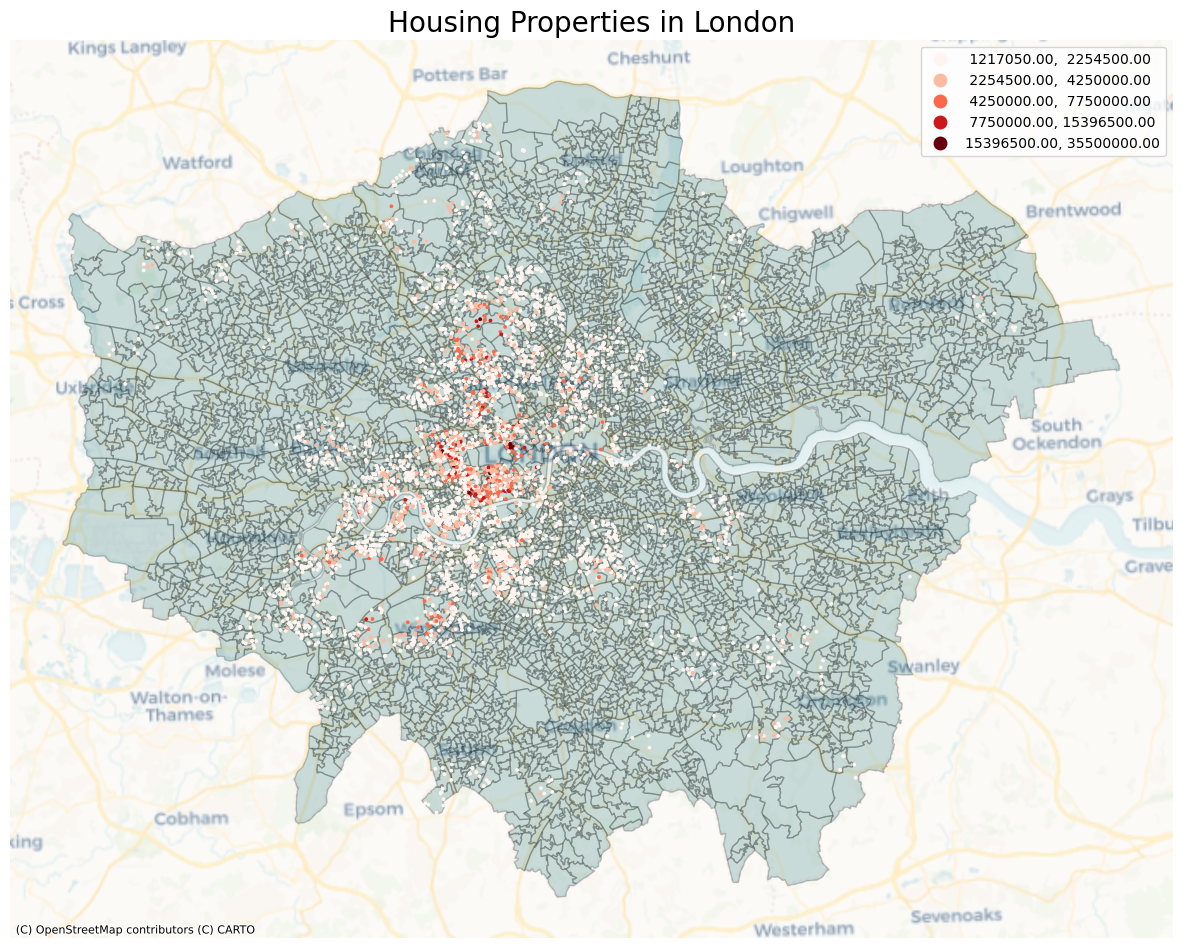

In [123]:
fig, ax = plt.subplots(figsize=(15, 15))


lsoa.plot(ax=ax, color='#00615f', edgecolor='black',alpha = 0.2)


outliers.plot(ax=ax,marker='o', markersize=3,column="price",scheme = "NaturalBreaks", cmap="Reds",legend=True)


# this adds the basemap

ctx.add_basemap(ax, crs=outliers.crs, alpha=0.6, source=ctx.providers.CartoDB.Voyager, zoom =10)


# this sets the title
ax.set_title("Housing Properties in London",fontsize= 20)

# this removes the axis
ax.set_axis_off()


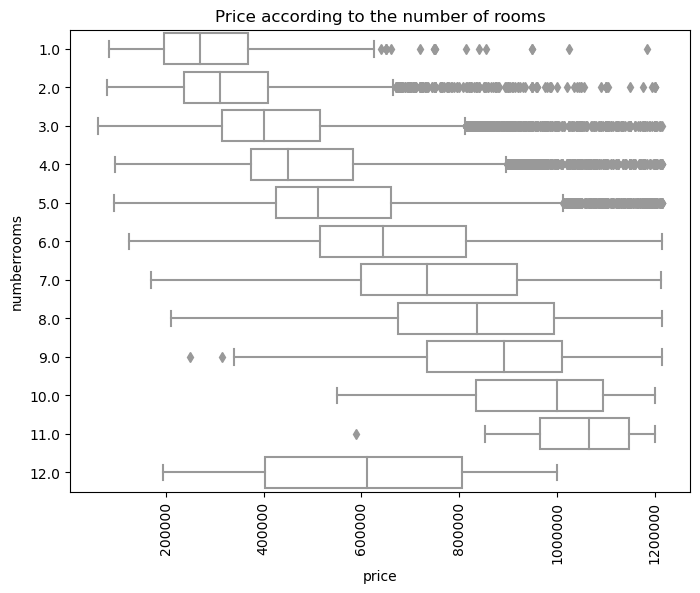

In [124]:
plt.figure(figsize=(8,6))
plt.title('Price according to the number of rooms',fontsize=12)
sns.boxplot(data=df_without_outliers ,x='price',y='numberrooms',orient='h',color='white')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [125]:
df_time = london_property_gdf[['price',"dateoftransfer"]]

df_time1 = df_time.groupby("dateoftransfer").median("price")

df_time1.head()

price
dateoftransfer          
01/01/2020      447000.0
01/04/2020      480000.0
01/05/2020      468500.0
01/06/2020      468500.0
01/07/2020      525000.0

In [126]:
df_time.set_index('dateoftransfer', inplace=True, drop=True)
df_time.head()

price
dateoftransfer         
11/02/2020       746000
08/10/2020       649950
10/03/2020      1485000
06/02/2020      1500000
02/04/2020      1624500

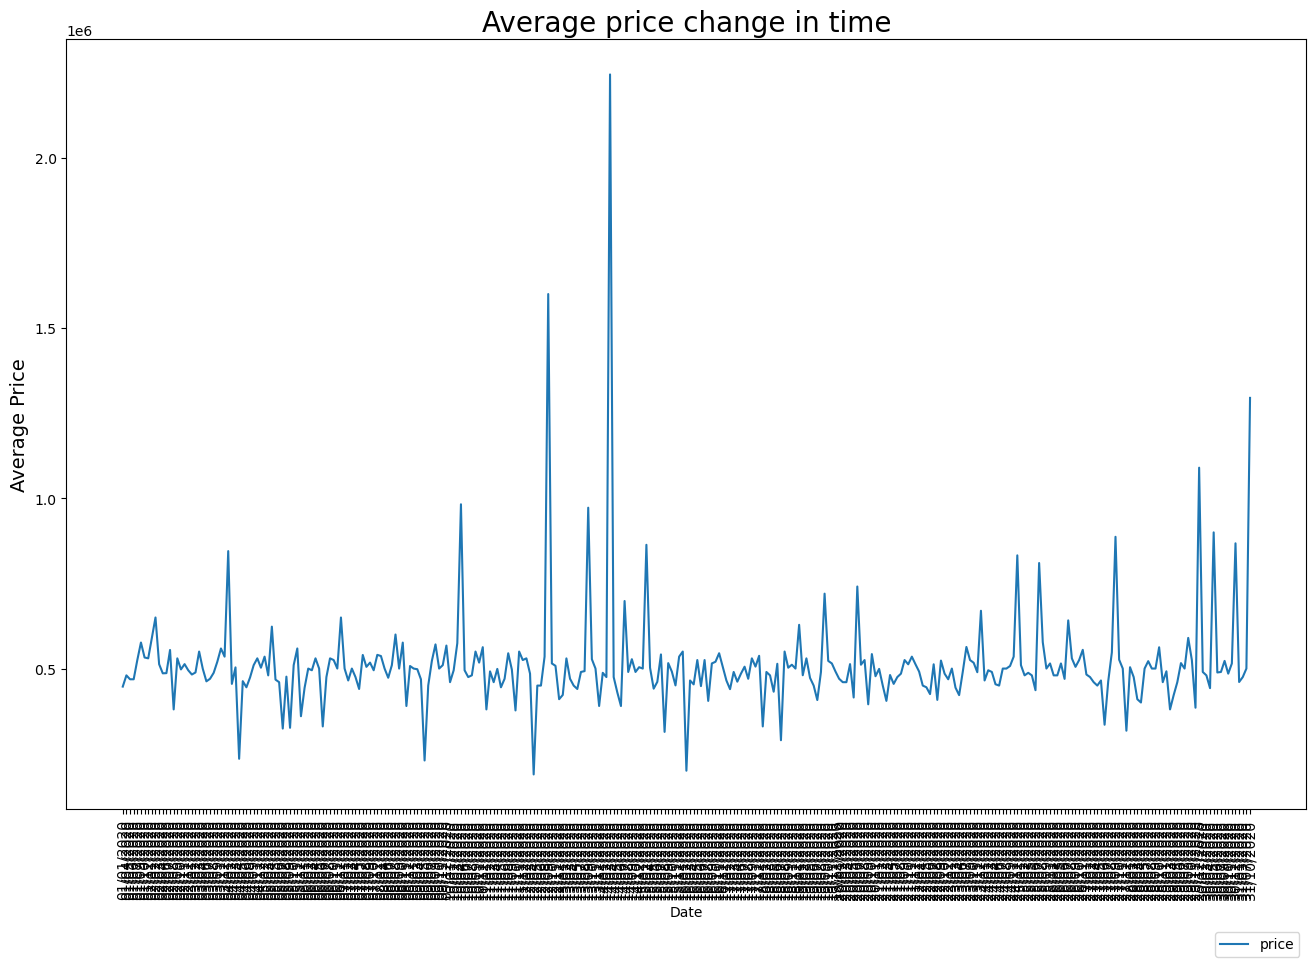

In [127]:
plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 10}) 
plt.title('Average price change in time',fontsize=20)
sns.lineplot(data=df_time1)
plt.legend(bbox_to_anchor=(1.0, -0.15))
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Average Price',fontsize=14)
plt.show()

plt.show()

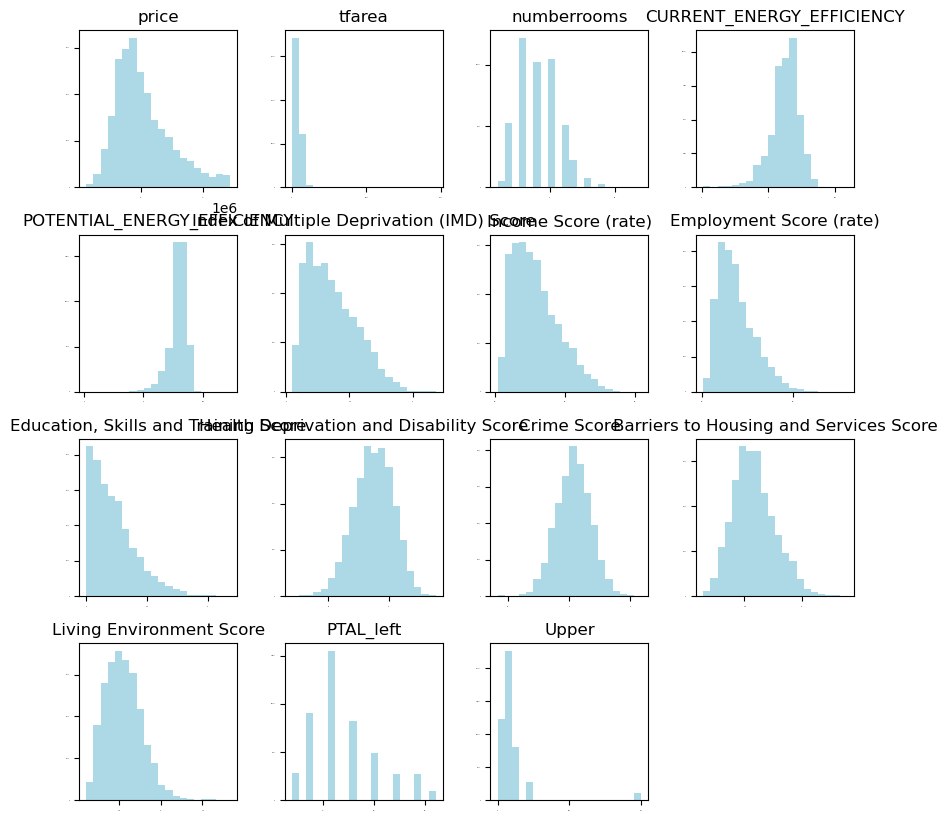

In [128]:
df_without_outliers.hist(bins=20,
       figsize=(10,10), 
       color='lightblue', 
       xlabelsize=0, 
       ylabelsize=0, 
       grid=False
      )
plt.show()

In [129]:
# pulls out only numeric data columns - in case there were any non-numeric ones
numeric_data = df_without_outliers.select_dtypes(include=[np.number])

# imports function to check whether a variable is over a given amount of skewedness
from scipy.stats import skew

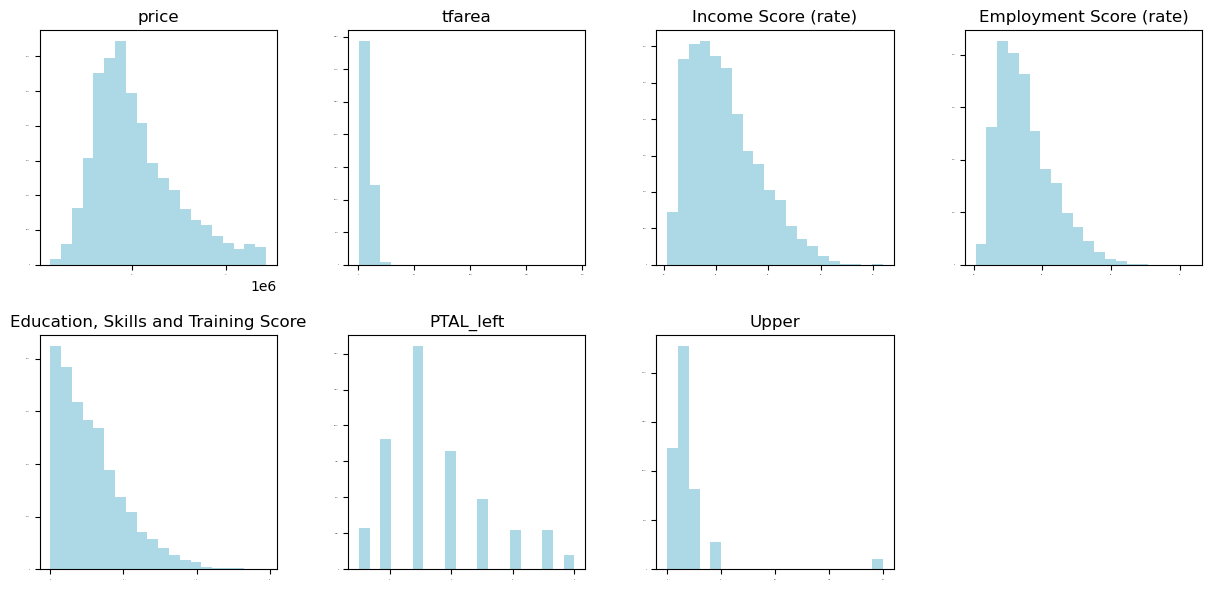

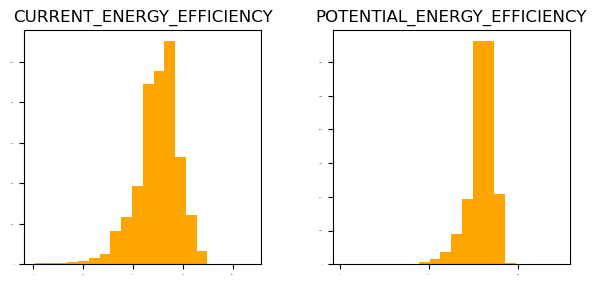

In [130]:
# quantifies the skewedness of the numeric data columns
skewed = df_without_outliers[numeric_data.columns].apply(lambda df_without_outliers: skew(df_without_outliers.dropna().astype(float)))

# and extracts the index of only variables with a skew value of greater than .75
rskewed = skewed[skewed > 0.75 ].index

# and extracts the index of only variables with a skew value of less than -.75
lskewed = skewed[skewed < -0.75 ].index

# and uses this index to map the right skewed variables
df_without_outliers[rskewed].hist(bins=20, figsize=(15, 7), color='lightblue', xlabelsize=0, ylabelsize=0, grid=False, layout=(2, 4))
plt.show()

# and uses this index to map the left skewed variables
df_without_outliers[lskewed].hist(bins=20, figsize=(15, 7), color='orange', xlabelsize=0, ylabelsize=0, grid=False, layout=(2, 4))
plt.show()


In [131]:
df_without_outliers.drop("Index of Multiple Deprivation (IMD) Score", axis=1, inplace = True)

In [132]:
# set X and y
numeric_data = df_without_outliers.select_dtypes(include=[np.number]).dropna()
X=numeric_data[numeric_data.columns[numeric_data.columns!='price']]
y=numeric_data['price']

print (X.shape)
print (y.shape)

(47011, 13)
(47011,)


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

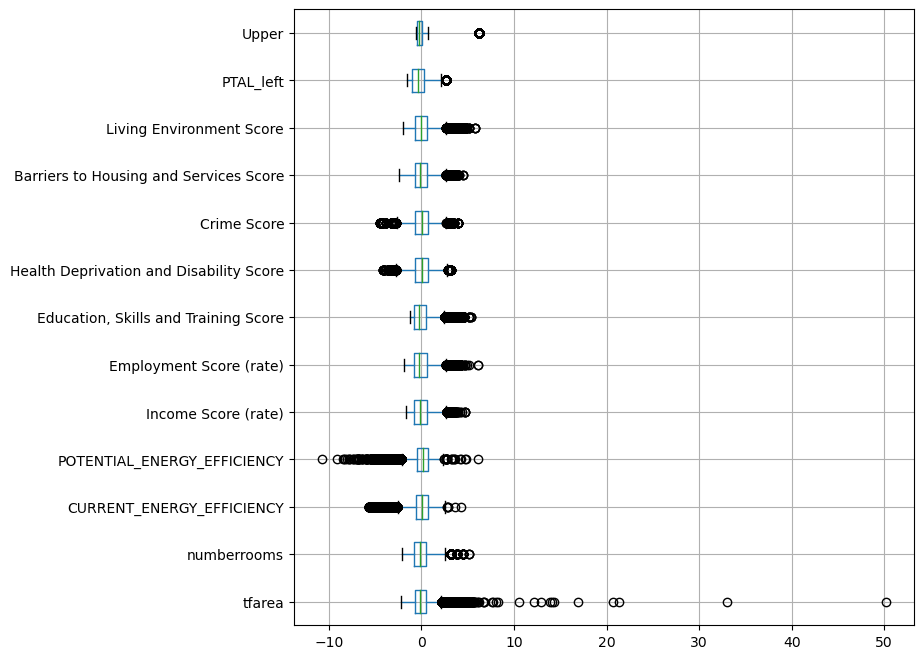

In [134]:
scaled_X.boxplot(vert=False,figsize=(8,8))
plt.show()

In [135]:
from sklearn.model_selection import train_test_split


### split the dataset
(X_train, X_test, y_train, y_test) = train_test_split(scaled_X, y, train_size=0.7)#, random_state=1)


In [136]:
from sklearn import linear_model
model2 = linear_model.Lasso(alpha=0.1)
model2.fit(X_train,y_train)

Lasso(alpha=0.1)

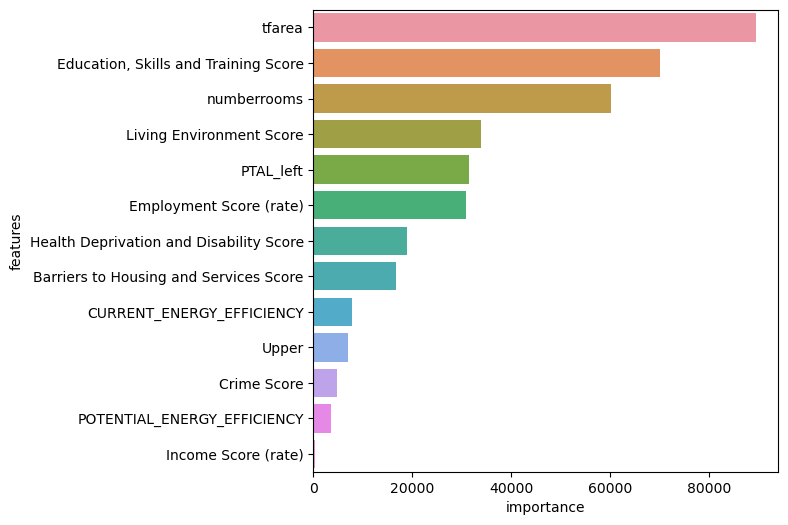

In [137]:
coef = pd.DataFrame(model2.coef_, index = X.columns)
coef = coef.reset_index()
coef.columns=['features','importance']
coef['importance']=np.abs(coef['importance'])
coef=coef.sort_values(by='importance',ascending=False)
plt.figure(figsize=(6,6))

sns.barplot(x='importance',y='features',data=coef,)
plt.show()

In [138]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

y_pred=model2.predict(X_test)
print ('MSE: ',mean_squared_error(y_test,y_pred))
print ('MAE: ',mean_absolute_error(y_test,y_pred))
print ('R2: ', r2_score(y_test,y_pred))

MSE:  20707385325.428226
MAE:  105974.86873995936
R2:  0.5881474498105783


In [139]:
import statsmodels.regression


ols = statsmodels.regression.linear_model.OLS(y, X)
results = ols.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                          5.238e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                        0.00
Time:                        01:02:43   Log-Likelihood:                     -6.2483e+05
No. Observations:               47011   AIC:                                  1.250e+06
Df Residuals:                   46998   BIC:                                  1.250e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

In [140]:
from sklearn.linear_model import SGDRegressor
model3 = linear_model.SGDRegressor()
model3.fit(X_train,y_train)


SGDRegressor()

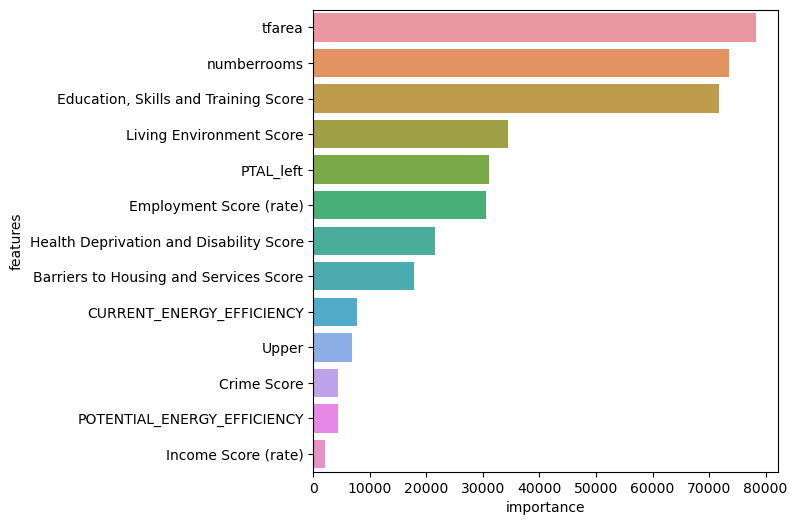

In [141]:
coef = pd.DataFrame(model3.coef_, index = X.columns)
coef = coef.reset_index()
coef.columns=['features','importance']
coef['importance']=np.abs(coef['importance'])
coef=coef.sort_values(by='importance',ascending=False)
plt.figure(figsize=(6,6))

sns.barplot(x='importance',y='features',data=coef,)
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

y_pred=model3.predict(X_test)
print ('MSE: ',mean_squared_error(y_test,y_pred))
print ('MAE: ',mean_absolute_error(y_test,y_pred))
print ('R2: ', r2_score(y_test,y_pred))

MSE:  20899395613.275913
MAE:  107388.53180915753
R2:  0.5843285260077955
